In [1]:
# Colab library to upload files to notebook
from google.colab import files
# Install Kaggle library
!pip install -q kaggle
# Upload the kaggle.json file
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json
# Uploading the data 
!kaggle competitions download -c ashrae-energy-prediction

Saving kaggle.json to kaggle.json
kaggle.json
total 4
-rw------- 1 root root 69 Jan  8 05:36 kaggle.json
{"username":"haythemlajjem","key":"c0fb8e839ab52e1119e8d32eeb878e8a"}Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4)
 81% 72.0M/88.4M [00:00<00:00, 238MB/s]
100% 88.4M/88.4M [00:00<00:00, 224MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 182MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 168MB/s]
 99% 119M/120M [00:00<00:00, 181MB/s]
100% 120M/120M [00:00<00:00, 189MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 39.2MB/s]
 97% 161M/167M [00:07<00:00, 11.6MB/s]
100% 167M/167M [00:07<00:00, 23.5MB/s]


## Importing packages

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# sklearn specifics
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specifics
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

Using TensorFlow backend.


## Train.csv cleaning

In [52]:
# importing train.csv data 
df_train = pd.read_csv('train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [53]:
# transforming timestamp column to 4 columns year, month, day, hour
df_train['timestamp']=pd.to_datetime(df_train['timestamp'])
df_train['year']=df_train.timestamp.apply(lambda x: x.year)
df_train['month']=df_train.timestamp.apply(lambda x: x.month)
df_train['day']=df_train.timestamp.apply(lambda x: x.day)
df_train['hour']=df_train.timestamp.apply(lambda x: x.hour)
df_train.head()

,building_id,meter,timestamp,meter_reading,year,month,day,hour
0,0,0,2016-01-01,0.0,2016,1,1,0
1,1,0,2016-01-01,0.0,2016,1,1,0
2,2,0,2016-01-01,0.0,2016,1,1,0
3,3,0,2016-01-01,0.0,2016,1,1,0
4,4,0,2016-01-01,0.0,2016,1,1,0


In [58]:
# Dropping timestamp column
df_train=df_train.drop(columns=['timestamp'])
df_train

KeyError: ignored

In [59]:
# df_train shape
print("Shape :",df_train.shape)
df_train.describe()



Shape : (20216100, 7)


,building_id,meter,meter_reading,year,month,day,hour
count,2.021610e+07,2.021610e+07,2.021610e+07,20216100.0,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,2016.0,6.578453e+00,1.576123e+01,1.150232e+01
std,4.269133e+02,9.309921e-01,1.532356e+05,0.0,3.436662e+00,8.820535e+00,6.922017e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,2016.0,4.000000e+00,8.000000e+00,6.000000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,2016.0,7.000000e+00,1.600000e+01,1.200000e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02,2016.0,1.000000e+01,2.300000e+01,1.800000e+01
max,1.448000e+03,3.000000e+00,2.190470e+07,2016.0,1.200000e+01,3.100000e+01,2.300000e+01


In [60]:
print("Number of NAN values for meter column :",df_train.meter.isnull().sum())
print("Number of NAN values for meter_reading column :",df_train.meter_reading.isnull().sum())

Number of NAN values for meter column : 0
Number of NAN values for meter_reading column : 0


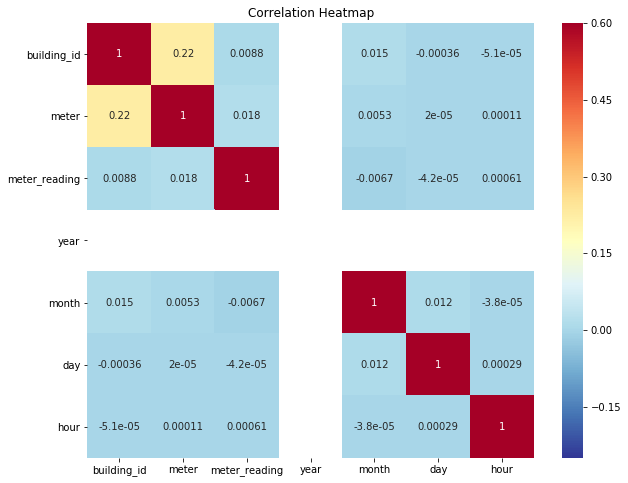

In [61]:
# Correlations
corrs = df_train.corr()
plt.figure(figsize = (10, 8))


sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [0]:
# save df_train to train_clean.csv
df_train.to_csv ("train_clean.csv", index = None, header=True) 

## Building_metadata.csv cleaning

In [0]:
# Import  building_metada.csv into pandas dataframe
df_building_metadata = pd.read_csv('building_metadata.csv',  header=0)

In [10]:
df_building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [11]:
print ("Shape : ",df_building_metadata.shape)
df_building_metadata.describe()

Shape :  (1449, 6)


,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [12]:
df_building_metadata.dtypes

site_id          int64
building_id      int64
primary_use     object
square_feet      int64
year_built     float64
floor_count    float64
dtype: object

In [13]:
print("Number of NAN values for square_feet column :",df_building_metadata.square_feet.isnull().sum()," ===> mean : ",df_building_metadata.square_feet.isnull().mean())
print("Number of NAN values for year_built column :",df_building_metadata.year_built.isnull().sum()," ===> mean : ",df_building_metadata.year_built.isnull().mean())
print("Number of NAN values for floor_count column :",df_building_metadata.floor_count.isnull().sum()," ===> mean : ",df_building_metadata.floor_count.isnull().mean())
print("Number of NAN values for primary_use column :",df_building_metadata.primary_use.isnull().sum()," ===> mean : ",df_building_metadata.primary_use.isnull().mean())

Number of NAN values for square_feet column : 0  ===> mean :  0.0
Number of NAN values for year_built column : 774  ===> mean :  0.5341614906832298
Number of NAN values for floor_count column : 1094  ===> mean :  0.7550034506556246
Number of NAN values for primary_use column : 0  ===> mean :  0.0


In [14]:
df_building_metadata['primary_use'] = df_building_metadata.primary_use.astype('category')
df_building_metadata.dtypes

site_id           int64
building_id       int64
primary_use    category
square_feet       int64
year_built      float64
floor_count     float64
dtype: object

In [15]:
df_building_metadata.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [0]:
df_building_metadata.loc[df_building_metadata.primary_use == 'Healthcare' , 'primary_use'] = "Other" 
df_building_metadata.loc[df_building_metadata.primary_use == 'Parking' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Warehouse/storage' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Manufacturing/industrial' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Retail' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Services' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Technology/science' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Food sales and service' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Utility' , 'primary_use'] = "Other"
df_building_metadata.loc[df_building_metadata.primary_use == 'Religious worship' , 'primary_use'] = "Other"

 

In [17]:
df_building_metadata.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                            134
Warehouse/storage                  0
Utility                            0
Technology/science                 0
Services                           0
Retail                             0
Religious worship                  0
Parking                            0
Manufacturing/industrial           0
Healthcare                         0
Food sales and service             0
Name: primary_use, dtype: int64

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_building_metadata['primary_use'])
df_building_metadata['primary_use']=le.transform(df_building_metadata['primary_use'])
df_building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,7432,2008.0,NaN
1,0,1,0,2720,2004.0,NaN
2,0,2,0,5376,1991.0,NaN
3,0,3,0,23685,2002.0,NaN
4,0,4,0,116607,1975.0,NaN


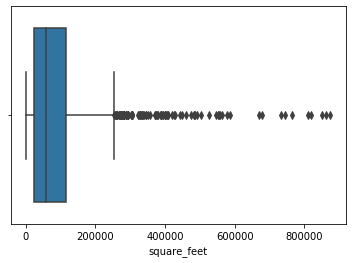

In [19]:

sns.boxplot(x=df_building_metadata['square_feet'])

In [20]:
print(df_building_metadata['square_feet'].skew())

2.9507722351775865


In [0]:
df_building_metadata["log_square_feet"] = df_building_metadata["square_feet"].map(lambda i: np.log1p(i) ) 

-0.6845392526483826


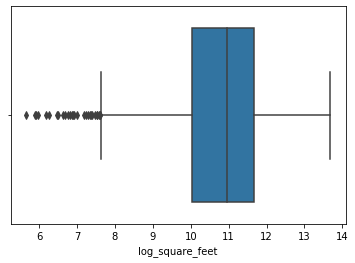

In [22]:
print(df_building_metadata['log_square_feet'].skew())
sns.boxplot(x=df_building_metadata['log_square_feet'])

In [23]:
df_building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count,log_square_feet
0,0,0,0,7432,2008.0,NaN,8.913685
1,0,1,0,2720,2004.0,NaN,7.908755
2,0,2,0,5376,1991.0,NaN,8.589886
3,0,3,0,23685,2002.0,NaN,10.072639
4,0,4,0,116607,1975.0,NaN,11.666573
...,...,...,...,...,...,...,...
1444,15,1444,1,19619,1914.0,NaN,9.884305
1445,15,1445,0,4298,NaN,NaN,8.366138
1446,15,1446,1,11265,1997.0,NaN,9.329545
1447,15,1447,2,29775,2001.0,NaN,10.301458


In [0]:
df_building_metadata = df_building_metadata.drop(["square_feet","year_built","floor_count"], axis=1)

In [25]:
df_building_metadata

,site_id,building_id,primary_use,log_square_feet
0,0,0,0,8.913685
1,0,1,0,7.908755
2,0,2,0,8.589886
3,0,3,0,10.072639
4,0,4,0,11.666573
...,...,...,...,...
1444,15,1444,1,9.884305
1445,15,1445,0,8.366138
1446,15,1446,1,9.329545
1447,15,1447,2,10.301458


In [0]:
df_building_metadata.to_csv ("building_metadata_clean.csv", index = None, header=True) #Don't forget to add '.csv' at the end of the path

## weather_train

In [0]:
df_weather = pd.read_csv('weather_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [27]:
df_weather

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [28]:
print("Shape : ",df_weather.shape)

Shape :  (139773, 9)


In [29]:
df_weather.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [0]:
df_weather['timestamp']=pd.to_datetime(df_weather['timestamp'])
df_weather['year']=df_weather.timestamp.apply(lambda x: x.year)
df_weather['month']=df_weather.timestamp.apply(lambda x: x.month)
df_weather['day']=df_weather.timestamp.apply(lambda x: x.day)
df_weather['hour']=df_weather.timestamp.apply(lambda x: x.hour)

In [31]:
df_weather.columns

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [0]:
df_weather = df_weather.drop(["timestamp"], axis=1)

In [33]:
print("MEAN of NAN values for air_temperature column : ",df_weather.air_temperature.isnull().mean()) 
print("MEAN of NAN values for cloud_coverage column : ",df_weather.cloud_coverage.isnull().mean())
print("MEAN of NAN values for dew_temperature column : ",df_weather.dew_temperature.isnull().mean())
print("MEAN of NAN values for precip_depth_1_hr column : ",df_weather.precip_depth_1_hr.isnull().mean())
print("MEAN of NAN values for sea_level_pressure column : ",df_weather.sea_level_pressure.isnull().mean())
print("MEAN of NAN values for wind_direction column : ",df_weather.wind_direction.isnull().mean())
print("MEAN of NAN values for wind_speed column : ",df_weather.wind_speed.isnull().mean())

MEAN of NAN values for air_temperature column :  0.0003934951671639015
MEAN of NAN values for cloud_coverage column :  0.4948952945132465
MEAN of NAN values for dew_temperature column :  0.0008084537070821976
MEAN of NAN values for precip_depth_1_hr column :  0.3597905174819171
MEAN of NAN values for sea_level_pressure column :  0.07596603063538737
MEAN of NAN values for wind_direction column :  0.04484414014151517
MEAN of NAN values for wind_speed column :  0.0021749551057786555


In [0]:
df_weather = df_weather.drop(["cloud_coverage","precip_depth_1_hr"], axis=1)

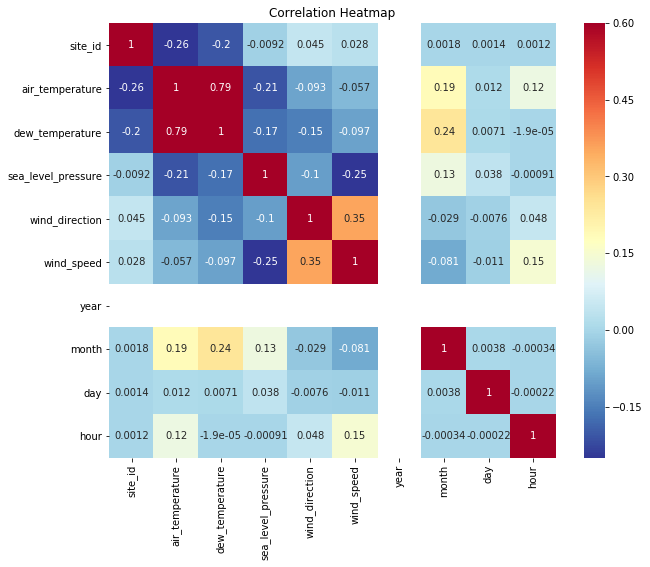

In [35]:

corrs = df_weather.corr()
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [0]:
df_weather = df_weather.drop(["air_temperature"], axis=1)

In [37]:
df_weather

,site_id,dew_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour
0,0,20.0,1019.7,0.0,0.0,2016,1,1,0
1,0,21.1,1020.2,70.0,1.5,2016,1,1,1
2,0,21.1,1020.2,0.0,0.0,2016,1,1,2
3,0,20.6,1020.1,0.0,0.0,2016,1,1,3
4,0,20.0,1020.0,250.0,2.6,2016,1,1,4
...,...,...,...,...,...,...,...,...,...
139768,15,-8.0,NaN,180.0,5.7,2016,12,31,19
139769,15,-8.9,1007.4,180.0,7.7,2016,12,31,20
139770,15,-7.2,1007.5,180.0,5.1,2016,12,31,21
139771,15,-6.7,1008.0,170.0,4.6,2016,12,31,22


In [38]:


print("Number of NAN values for dew_temperature column : ",df_weather.dew_temperature.isnull().sum())
print("Number of NAN values for sea_level_pressure column : ",df_weather.sea_level_pressure.isnull().sum())
print("Number of NAN values for wind_direction column : ",df_weather.wind_direction.isnull().sum())
print("Number of NAN values for wind_speed column : ",df_weather.wind_speed.isnull().sum())

Number of NAN values for dew_temperature column :  113
Number of NAN values for sea_level_pressure column :  10618
Number of NAN values for wind_direction column :  6268
Number of NAN values for wind_speed column :  304


In [39]:
df_weather.describe()

,site_id,dew_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour
count,139773.000000,139660.000000,129155.000000,133505.000000,139469.000000,139773.0,139773.000000,139773.000000,139773.000000
mean,7.478977,7.350158,1016.158038,180.526632,3.560527,2016.0,6.523871,15.771043,11.504017
std,4.604744,9.790235,7.629684,111.523629,2.335874,0.0,3.447111,8.809815,6.923170
min,0.000000,-35.000000,968.200000,0.000000,0.000000,2016.0,1.000000,1.000000,0.000000
25%,3.000000,0.600000,1011.800000,80.000000,2.100000,2016.0,4.000000,8.000000,6.000000
50%,7.000000,8.300000,1016.400000,190.000000,3.100000,2016.0,7.000000,16.000000,12.000000
75%,11.000000,14.400000,1020.800000,280.000000,5.000000,2016.0,10.000000,23.000000,18.000000
max,15.000000,26.100000,1045.500000,360.000000,19.000000,2016.0,12.000000,31.000000,23.000000


In [0]:
#df_weather["dew_temperature"].fillna(df_weather.dew_temperature.mean(), inplace = True) 
# df_weather["sea_level_pressure"].fillna(df_weather.mean(), inplace = True) 
# df_weather["dew_temperature"].fillna(df_weather.mean(), inplace = True) 
# df_weather["dew_temperature"].fillna(df_weather.mean(), inplace = True)


# filling a missing value with previous ones   
df_weather=df_weather.fillna(method ='pad')

In [41]:
print("Number of NAN values for dew_temperature column : ",df_weather.dew_temperature.isnull().sum())
print("Number of NAN values for sea_level_pressure column : ",df_weather.sea_level_pressure.isnull().sum())
print("Number of NAN values for wind_direction column : ",df_weather.wind_direction.isnull().sum())
print("Number of NAN values for wind_speed column : ",df_weather.wind_speed.isnull().sum())

Number of NAN values for dew_temperature column :  0
Number of NAN values for sea_level_pressure column :  0
Number of NAN values for wind_direction column :  0
Number of NAN values for wind_speed column :  0


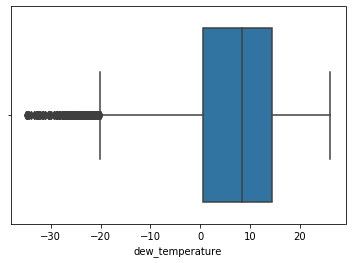

In [42]:

sns.boxplot(x=df_weather['dew_temperature'])

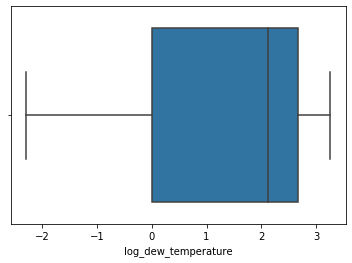

In [43]:
df_weather["log_dew_temperature"] = df_weather["dew_temperature"].map(lambda i: np.log(i) if i > 0 else 0) 
sns.boxplot(x=df_weather['log_dew_temperature'])

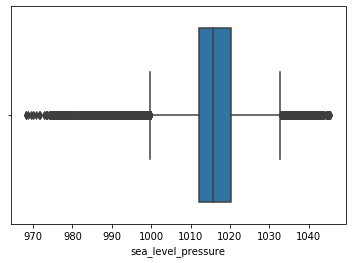

In [45]:
sns.boxplot(x=df_weather['sea_level_pressure'])	

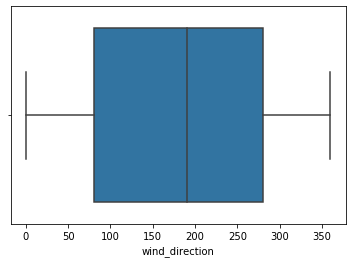

In [46]:
sns.boxplot(x=df_weather['wind_direction'])	

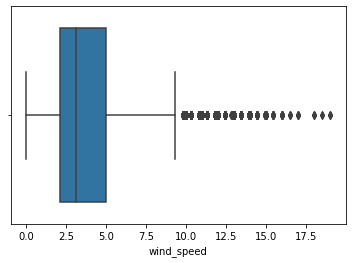

In [47]:
sns.boxplot(x=df_weather['wind_speed'])	

In [0]:
df_weather["log_wind_speed"] = df_weather["wind_speed"].map(lambda i: np.log(i) if i > 0 else 0) 

In [49]:
df_weather

,site_id,dew_temperature,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour,log_dew_temperature,log_wind_speed
0,0,20.0,1019.7,0.0,0.0,2016,1,1,0,2.995732,0.000000
1,0,21.1,1020.2,70.0,1.5,2016,1,1,1,3.049273,0.405465
2,0,21.1,1020.2,0.0,0.0,2016,1,1,2,3.049273,0.000000
3,0,20.6,1020.1,0.0,0.0,2016,1,1,3,3.025291,0.000000
4,0,20.0,1020.0,250.0,2.6,2016,1,1,4,2.995732,0.955511
...,...,...,...,...,...,...,...,...,...,...,...
139768,15,-8.0,1007.7,180.0,5.7,2016,12,31,19,0.000000,1.740466
139769,15,-8.9,1007.4,180.0,7.7,2016,12,31,20,0.000000,2.041220
139770,15,-7.2,1007.5,180.0,5.1,2016,12,31,21,0.000000,1.629241
139771,15,-6.7,1008.0,170.0,4.6,2016,12,31,22,0.000000,1.526056


In [0]:
df_weather = df_weather.drop(["dew_temperature","wind_speed"], axis=1)

In [0]:
export_csv = df_weather.to_csv ("weather_clean.csv", index = None, header=True) #Don't forget to add '.csv' at the end of the path

## Merging Train Data

In [0]:
train_data =  pd.merge(df_train, df_building_metadata, on=['building_id'],sort=False)

In [0]:
train_data=pd.merge(train_data, df_weather, on=['site_id','year','month','day','hour'],sort=False)

In [64]:
train_data

,building_id,meter,meter_reading,year,month,day,hour,site_id,primary_use,log_square_feet,dew_temperature,sea_level_pressure,wind_direction,wind_speed,log_dew_temperature,log_wind_speed
0,0,0,0.0000,2016,1,1,0,0,0,8.913685,20.0,1019.7,0.0,0.0,2.995732,0.000000
1,1,0,0.0000,2016,1,1,0,0,0,7.908755,20.0,1019.7,0.0,0.0,2.995732,0.000000
2,2,0,0.0000,2016,1,1,0,0,0,8.589886,20.0,1019.7,0.0,0.0,2.995732,0.000000
3,3,0,0.0000,2016,1,1,0,0,0,10.072639,20.0,1019.7,0.0,0.0,2.995732,0.000000
4,4,0,0.0000,2016,1,1,0,0,0,11.666573,20.0,1019.7,0.0,0.0,2.995732,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,15.3753,2016,3,24,12,15,2,9.960293,1.7,1016.8,0.0,0.0,0.530628,0.000000
20125601,1400,1,25.0848,2016,3,24,13,15,2,9.960293,2.2,1016.6,320.0,1.5,0.788457,0.405465
20125602,1400,1,32.3439,2016,3,24,14,15,2,9.960293,4.4,1015.2,110.0,2.1,1.481605,0.741937
20125603,1400,1,24.2214,2016,3,24,15,15,2,9.960293,4.4,1013.9,150.0,5.1,1.481605,1.629241


In [0]:
train_data=train_data[[        'building_id',               'meter',      
                      'year',               'month',                 'day',
                      'hour',             'site_id','primary_use'   ,  'log_square_feet',
        'sea_level_pressure',      'wind_direction', 'log_dew_temperature',
            'log_wind_speed', 'meter_reading']]

In [0]:
train_data = train_data.drop(["site_id","year"], axis=1)

In [0]:
train_data.to_csv ("train_data_clean.csv", index = None, header=True) 

In [187]:
train_data
#data=train_data

,building_id,meter,month,day,hour,primary_use,log_square_feet,sea_level_pressure,wind_direction,log_dew_temperature,log_wind_speed,meter_reading
0,0,0,1,1,0,0,8.914062,1019.5,0.0,2.996094,0.000000,0.000000
1,1,0,1,1,0,0,7.910156,1019.5,0.0,2.996094,0.000000,0.000000
2,2,0,1,1,0,0,8.593750,1019.5,0.0,2.996094,0.000000,0.000000
3,3,0,1,1,0,0,10.070312,1019.5,0.0,2.996094,0.000000,0.000000
4,4,0,1,1,0,0,11.664062,1019.5,0.0,2.996094,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,3,24,12,2,9.960938,1017.0,0.0,0.530762,0.000000,2.794922
20125601,1400,1,3,24,13,2,9.960938,1016.5,320.0,0.788574,0.405518,3.261719
20125602,1400,1,3,24,14,2,9.960938,1015.0,110.0,1.481445,0.741699,3.507812
20125603,1400,1,3,24,15,2,9.960938,1014.0,150.0,1.481445,1.628906,3.228516


## Building The Model

In [0]:
# import train_data_clean.csv 
data= pd.read_csv('train_data_clean.csv', header=0, sep=',', quotechar='"')

In [0]:
#reduce in memory size of data set

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [68]:
#data = reduce_mem_usage(data)
data=train_data
data

,building_id,meter,month,day,hour,primary_use,log_square_feet,sea_level_pressure,wind_direction,log_dew_temperature,log_wind_speed,meter_reading
0,0,0,1,1,0,0,8.913685,1019.7,0.0,2.995732,0.000000,0.0000
1,1,0,1,1,0,0,7.908755,1019.7,0.0,2.995732,0.000000,0.0000
2,2,0,1,1,0,0,8.589886,1019.7,0.0,2.995732,0.000000,0.0000
3,3,0,1,1,0,0,10.072639,1019.7,0.0,2.995732,0.000000,0.0000
4,4,0,1,1,0,0,11.666573,1019.7,0.0,2.995732,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,3,24,12,2,9.960293,1016.8,0.0,0.530628,0.000000,15.3753
20125601,1400,1,3,24,13,2,9.960293,1016.6,320.0,0.788457,0.405465,25.0848
20125602,1400,1,3,24,14,2,9.960293,1015.2,110.0,1.481605,0.741937,32.3439
20125603,1400,1,3,24,15,2,9.960293,1013.9,150.0,1.481605,1.629241,24.2214


In [69]:
# log normalization for meater_reading
data["meter_reading"]=np.log1p (data["meter_reading"])  
data.describe()

,building_id,meter,month,day,hour,primary_use,log_square_feet,sea_level_pressure,wind_direction,log_dew_temperature,log_wind_speed,meter_reading
count,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07
mean,7.972116e+02,6.617305e-01,6.583859e+00,1.577263e+01,1.151151e+01,1.702126e+00,1.103899e+01,1.015959e+03,1.708051e+02,1.691925e+00,1.069313e+00,4.145231e+00
std,4.263729e+02,9.310748e-01,3.435704e+00,8.819310e+00,6.923813e+00,1.706150e+00,1.181193e+00,6.936287e+00,1.140987e+02,1.224834e+00,6.205731e-01,2.146435e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.648974e+00,9.682000e+02,0.000000e+00,-2.302585e+00,-6.931472e-01,0.000000e+00
25%,3.910000e+02,0.000000e+00,4.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,1.038986e+01,1.011800e+03,7.000000e+01,0.000000e+00,7.419373e-01,2.960105e+00
50%,8.940000e+02,0.000000e+00,7.000000e+00,1.600000e+01,1.200000e+01,1.000000e+00,1.119423e+01,1.015700e+03,1.700000e+02,2.186051e+00,1.131402e+00,4.378897e+00
75%,1.176000e+03,1.000000e+00,1.000000e+01,2.300000e+01,1.800000e+01,3.000000e+00,1.184305e+01,1.020300e+03,2.700000e+02,2.778819e+00,1.526056e+00,5.594128e+00
max,1.448000e+03,3.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.000000e+00,1.368198e+01,1.045500e+03,3.600000e+02,3.261935e+00,2.944439e+00,1.690221e+01


In [70]:
# reduce data memory
data = reduce_mem_usage(data)

Mem. usage decreased to 518.22 Mb (74.0% reduction)


In [0]:
X=data.drop(columns=["meter_reading"])
y=data["meter_reading"]


In [72]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape); print(X_test.shape)

(16100484, 11)
(4025121, 11)


In [73]:
X.shape

(20125605, 11)

In [74]:
y

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
              ...   
20125600    2.794922
20125601    3.261719
20125602    3.507812
20125603    3.228516
20125604    2.853516
Name: meter_reading, Length: 20125605, dtype: float16

In [0]:
# the model
model = Sequential()
model.add(Dense(200, input_dim=11, activation= "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(100, activation= "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(50, activation= "relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1, activation= "relu"))

In [76]:
model.summary() # model summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               2400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 50)               

In [77]:
X.head()

,building_id,meter,month,day,hour,primary_use,log_square_feet,sea_level_pressure,wind_direction,log_dew_temperature,log_wind_speed
0,0,0,1,1,0,0,8.914062,1019.5,0.0,2.996094,0.0
1,1,0,1,1,0,0,7.910156,1019.5,0.0,2.996094,0.0
2,2,0,1,1,0,0,8.593750,1019.5,0.0,2.996094,0.0
3,3,0,1,1,0,0,10.070312,1019.5,0.0,2.996094,0.0
4,4,0,1,1,0,0,11.664062,1019.5,0.0,2.996094,0.0


In [0]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=0))
model.compile(loss='mse', optimizer='adam', metrics=[root_mean_squared_error])

model.fit(X_train,y_train,epochs=30,batch_size=8192,validation_data=(X_test,y_test),verbose=1)





Train on 16100484 samples, validate on 4025121 samples
Epoch 1/30





16100484/16100484 [==============================] - 156s 10us/step - loss: 3.8746 - root_mean_squared_error: 1.9316 - val_loss: 2.8403 - val_root_mean_squared_error: 1.6852
Epoch 2/30
16100484/16100484 [==============================] - 155s 10us/step - loss: 2.6675 - root_mean_squared_error: 1.6330 - val_loss: 2.6029 - val_root_mean_squared_error: 1.6132
Epoch 3/30
16100484/16100484 [==============================] - 158s 10us/step - loss: 2.5392 - root_mean_squared_error: 1.5933 - val_loss: 2.8558 - val_root_mean_squared_error: 1.6898
Epoch 4/30
16100484/16100484 [==============================] - 155s 10us/step - loss: 2.4679 - root_mean_squared_error: 1.5708 - val_loss: 2.4973 - val_root_mean_squared_error: 1.5802
Epoch 5/30
16100484/16100484 [==============================] - 154s 10us/step - loss: 2.4180 - root_mean_squared_error: 1.5548 - val_loss: 2.5549 - val_root_mean_squared_error: 1.5983
Epoch 6/30


In [0]:
# =====> loss = 2.2391